In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df_US = df[df['job_country'] == 'United States'].copy()

df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')


In [6]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

<Figure size 1200x600 with 0 Axes>

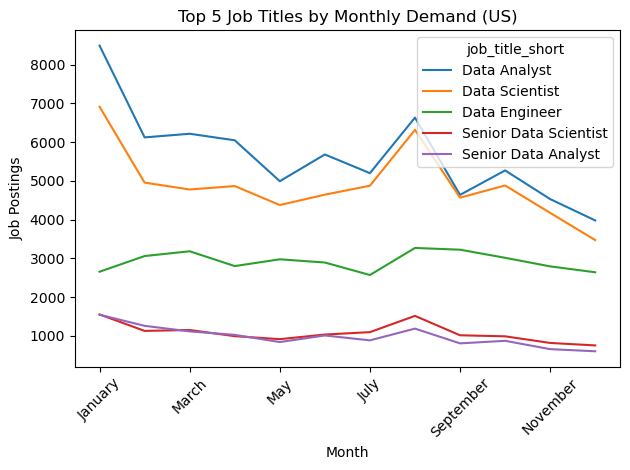

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Create month name column (make sure job_posted_date is datetime)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

# 2) Filter to US only (adjust if your country column name differs)
df_US = df[df['job_country'] == 'United States'].copy()

# 3) Pivot: rows = month, cols = job title, values = count of postings
df_US_pivot = df_US.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size',
    fill_value=0
)

# 4) Sort months correctly using an ordered index
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_US_pivot = df_US_pivot.reindex(month_order)

# 5) Keep only top 5 titles overall (optional but makes the chart readable)
top_titles = df_US_pivot.sum().sort_values(ascending=False).head(5).index
df_plot = df_US_pivot[top_titles]

# 6) Plot
plt.figure(figsize=(12, 6))
df_plot.plot()
plt.title('Top 5 Job Titles by Monthly Demand (US)')
plt.xlabel('Month')
plt.ylabel('Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [17]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.set_index('job_posted_date', inplace=True)
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2023-06-16 13:44:15,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
2023-01-14 13:18:07,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2023-10-10 13:14:55,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2023-07-04 13:01:41,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2023-08-07 14:29:36,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [19]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.set_index('job_posted_date', inplace=True) # This is code from the last problem
df.reset_index(drop=True, inplace=True)
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [20]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

pivot_table = df.pivot_table(values='salary_year_avg', index='company_name', aggfunc='median')
pivot_table.sort_index(inplace=True, ascending=False)
pivot_table.head()


,salary_year_avg
company_name,
​Illinois State Board of Education,62536.0
Технологическая компания,280000.0
ЛАНИТ,400000.0
ztp,95000.0
zooplus SE,161750.0


In [21]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

pivot_table = df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')
pivot_table.reset_index(inplace=True)
pivot_table.set_index('salary_year_avg', inplace=True)
pivot_table.head()



,job_title_short
salary_year_avg,
85000.0,Business Analyst
90000.0,Cloud Engineer
90000.0,Data Analyst
125000.0,Data Engineer
127500.0,Data Scientist
